In [185]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [186]:
df = pd.read_csv('./data/edx_courses.csv')
df

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [188]:
null_values = df.isnull().sum()
null_values

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       561
course_url              0
dtype: int64

In [190]:
df1=df.drop(['course_syllabus','summary','course_description','course_url'],axis=1)

In [191]:
null_values = df1.isnull().sum()
null_values

title              0
n_enrolled       120
course_type        0
institution        0
instructors        3
Level              0
subject            0
language           0
subtitles          3
course_effort      0
course_length      0
price              0
dtype: int64

In [192]:
df1.dropna(inplace=True)

In [193]:
df1.columns

Index(['title', 'n_enrolled', 'course_type', 'institution', 'instructors',
       'Level', 'subject', 'language', 'subtitles', 'course_effort',
       'course_length', 'price'],
      dtype='object')

In [194]:
df1["title"].nunique()

849

In [195]:
for col in df1.columns:
    print(col, " ----> ", df1[col].nunique(), "unique values")
    

title  ---->  849 unique values
n_enrolled  ---->  845 unique values
course_type  ---->  2 unique values
institution  ---->  106 unique values
instructors  ---->  686 unique values
Level  ---->  3 unique values
subject  ---->  30 unique values
language  ---->  8 unique values
subtitles  ---->  31 unique values
course_effort  ---->  49 unique values
course_length  ---->  18 unique values
price  ---->  45 unique values


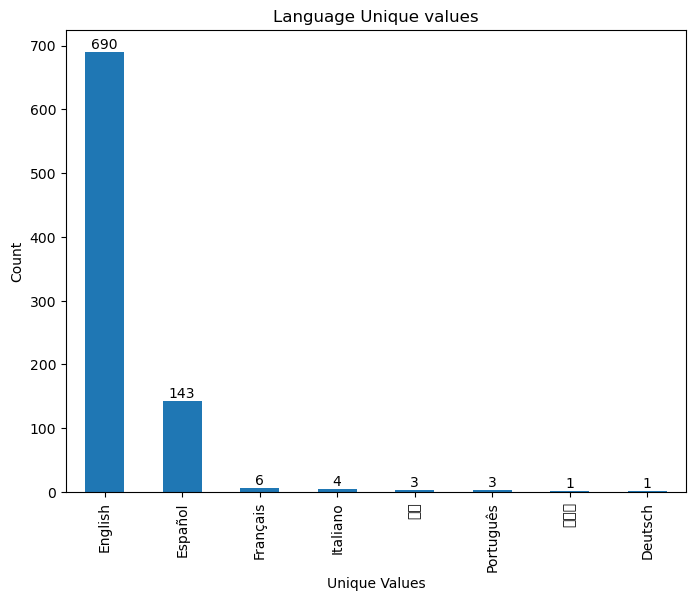

In [196]:
warnings.filterwarnings("ignore", message="Glyph")

language = df1['language'].value_counts()
language.plot(kind='bar', figsize=(8, 6))
for i, v in enumerate(language):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.title("Language Unique values")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()


c:\Users\rishi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)


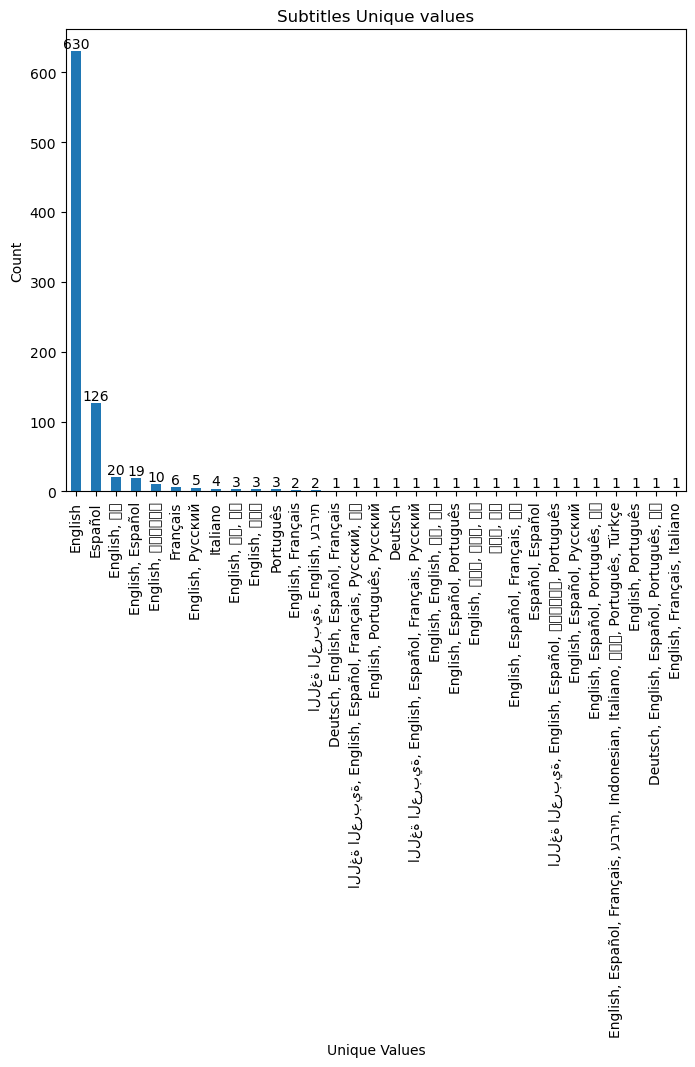

In [197]:
subtitles = df1['subtitles'].value_counts()
subtitles.plot(kind='bar', figsize=(8, 6))
for i, v in enumerate(subtitles):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.title("Subtitles Unique values")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

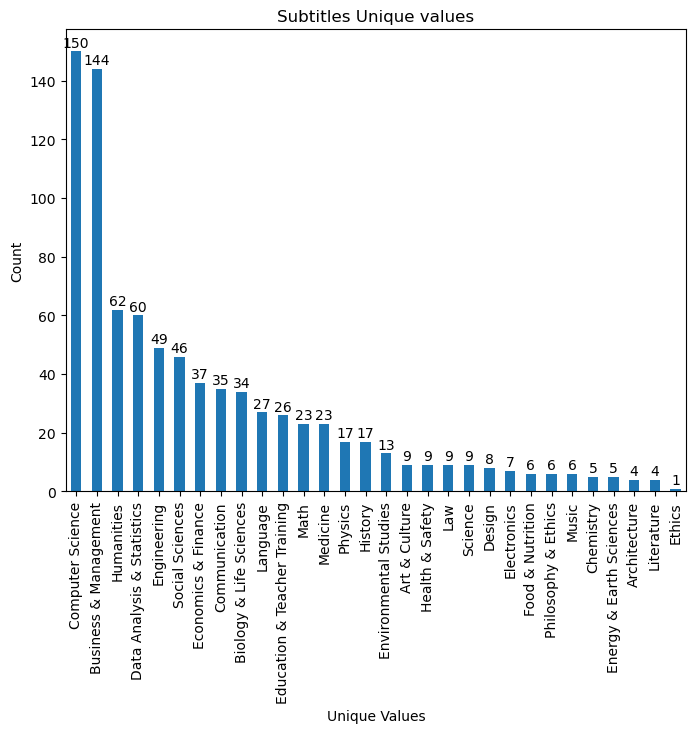

In [198]:
subject = df1["subject"].value_counts()
subject.plot(kind='bar', figsize=(8, 6))
for i, v in enumerate(subject):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.title("Subtitles Unique values")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

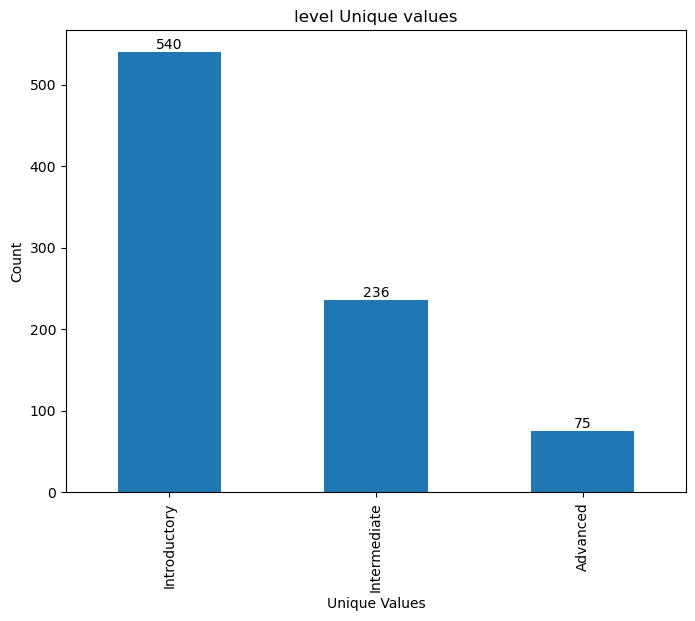

In [199]:
level = df1["Level"].value_counts()
level.plot(kind='bar', figsize=(8, 6))
for i, v in enumerate(level):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.title("level Unique values")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

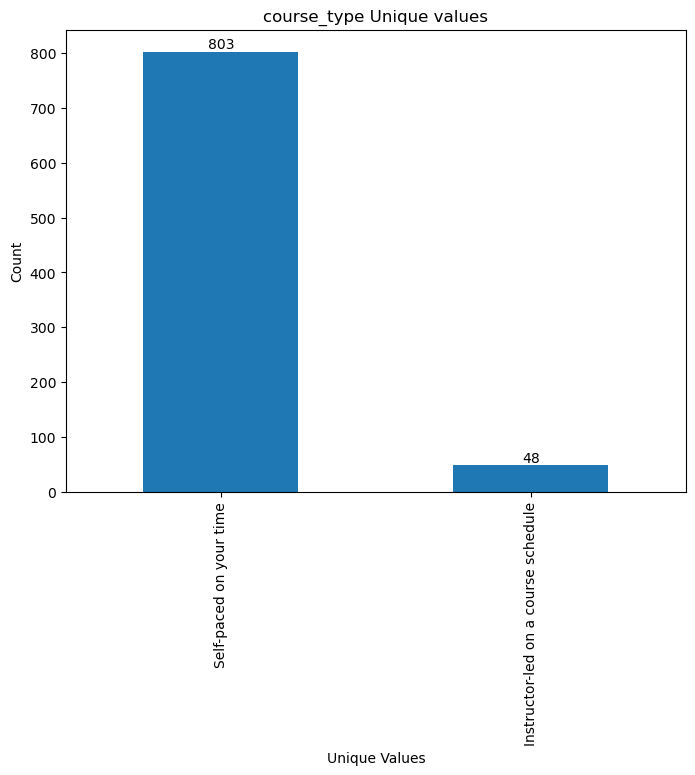

In [200]:
course_type = df1["course_type"].value_counts()
course_type.plot(kind='bar', figsize=(8, 6))
for i, v in enumerate(course_type):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.title("course_type Unique values")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

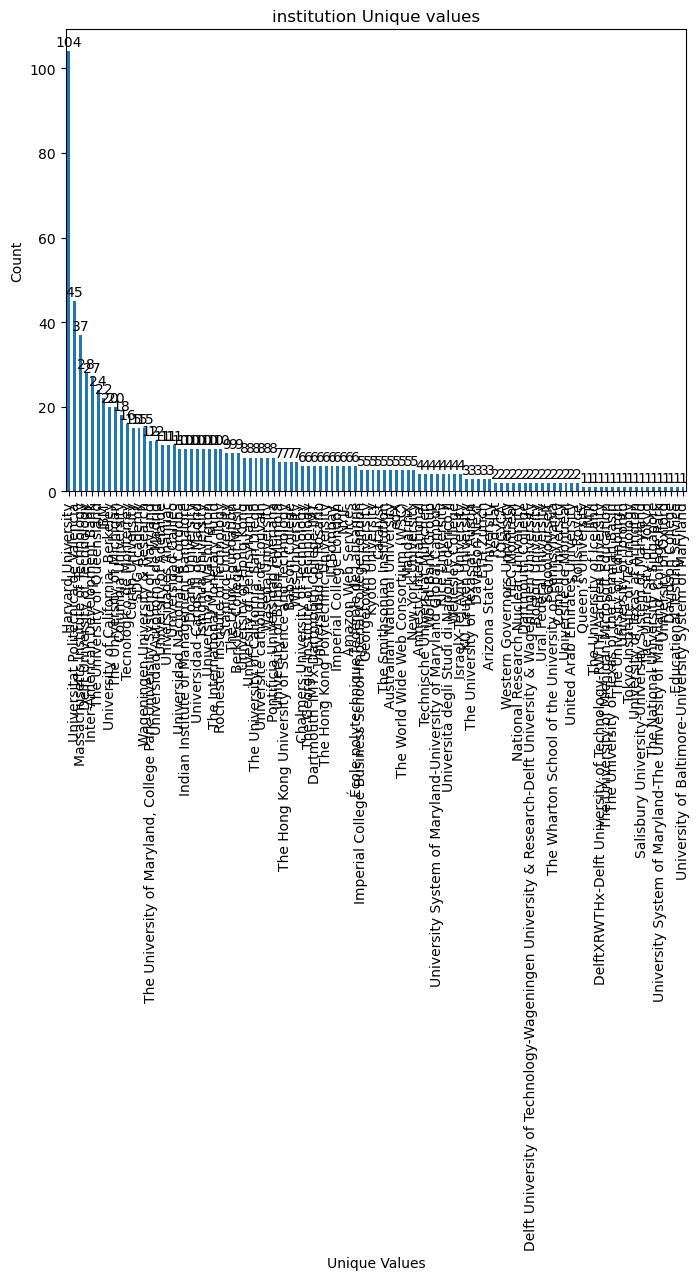

In [201]:
institution = df1["institution"].value_counts()
institution.plot(kind='bar', figsize=(8, 6))
for i, v in enumerate(institution):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.title("institution Unique values")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [202]:
for col in df1.columns:
    print(col, " ----> ", df1[col].nunique(), "unique values")

title  ---->  849 unique values
n_enrolled  ---->  845 unique values
course_type  ---->  2 unique values
institution  ---->  106 unique values
instructors  ---->  686 unique values
Level  ---->  3 unique values
subject  ---->  30 unique values
language  ---->  8 unique values
subtitles  ---->  31 unique values
course_effort  ---->  49 unique values
course_length  ---->  18 unique values
price  ---->  45 unique values


So categorical values:

1) course_type -> = nominal categorical (variables—those that do not have a meaningful order)
2) Level -> most of them are Introductory (As expected :)) -> so just number will be used, 0 1 2 (as order of numbers have a meaning) = Ordinal Relationship
3) language -> only English and Espanol as 0 and 1, rest are 2 = Ordinal Relationship
4) subtitles -> only English and Espanol (means if a datapoint will have Any of these languages, whole list of languages will be replaced with them) = Ordinal Relationship
5) Institutions -> convert 106 insti to 4 categories -> top institutes (according to data point >= 100), then mid insti (100-20) and then low insti (20-1) -> following Parato pattern = Ordinal Relationship
6) subject -> some subjects (below 10 points = 14 subjects) can be dropped -> But lets categorize them too = Ordinal Relationship

In [203]:
# Categorizing course_type (only two types)
df1 = pd.get_dummies(df1, columns=['course_type'], drop_first=True)  # avoiding "dummy variable trap" (multicollinearity)
df1.rename(columns={
    'course_type_Self-paced on your time': 'course_type',
}, inplace=True)


<Axes: xlabel='subject_category'>

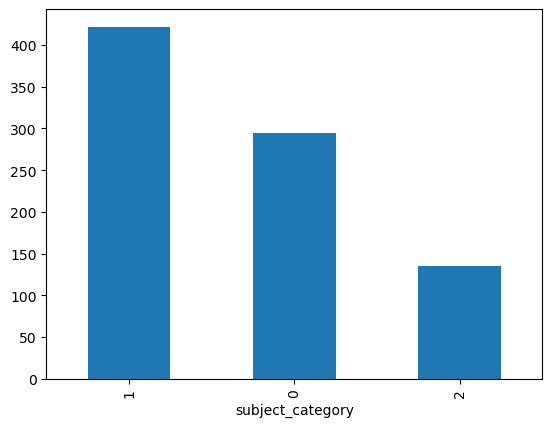

In [204]:
# categorizing insititutes according to their count in dataset 
def categorize_institution(count):
    if count >= 100:
        return 0 #'Top Institute'
    elif 20 <= count < 100:
        return 1 #'Mid Institute'
    elif 1 <= count < 20:
        return 2 #'Low Institute'

mapping_dict = subject.map(categorize_institution).to_dict()
df1['subject_category'] = df1['subject'].map(mapping_dict)
df1["subject_category"].value_counts().plot(kind='bar')

<Axes: xlabel='institution_category'>

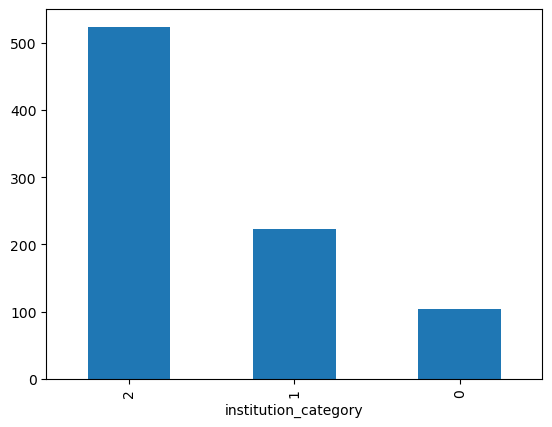

In [205]:
# categorizing insititutes according to their count in dataset 
def categorize_institution(count):
    if count >= 100:
        return 0 #'Top Institute'
    elif 20 <= count < 100:
        return 1 #'Mid Institute'
    elif 1 <= count < 20:
        return 2 #'Low Institute'

mapping_dict = institution.map(categorize_institution).to_dict()
df1['institution_category'] = df1['institution'].map(mapping_dict)
df1["institution_category"].value_counts().plot(kind='bar')

In [206]:
# Converting Level to numerical values
level_mapping = {
    'Introductory': 0,
    'Intermediate': 1,
    'Advanced': 2
}
df1['Level_numeric'] = df1['Level'].map(level_mapping)

In [207]:
# Assigning subject category accoridng to their counts in data set
def map_subject_counts(count):
    if count <= 20:
        return 0
    elif 20 < count <= 100:
        return 1
    else:
        return 2

mapping_dict = subject.map(map_subject_counts).to_dict()
df1['subject_category'] = df1['subject'].map(mapping_dict)


<Axes: xlabel='subject_category'>

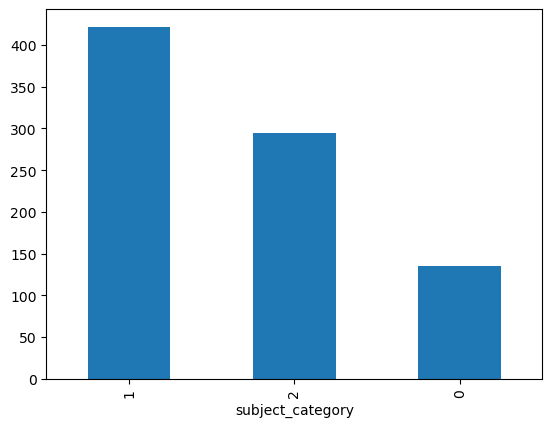

In [208]:
df1["subject_category"].value_counts().plot(kind='bar')

<Axes: xlabel='subtitle_category'>

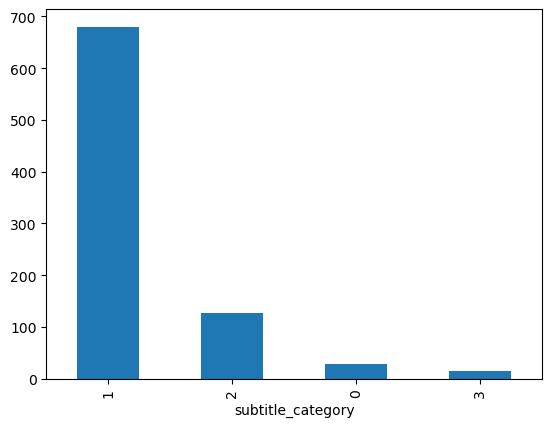

In [209]:
# rating subcategory -> if both english and Espanol in strings, then great! If none, then worst
def categorize_subtitles(subtitle_list):
    has_english = "English" in subtitle_list
    has_espanol = "Español" in subtitle_list
    
    if has_english and has_espanol:
        return 0
    elif has_english:
        return 1
    elif has_espanol:
        return 2
    else:
        return 3

df1['subtitle_category'] = df1['subtitles'].apply(categorize_subtitles)
df1["subtitle_category"].value_counts().plot(kind='bar')

<Axes: xlabel='language_category'>

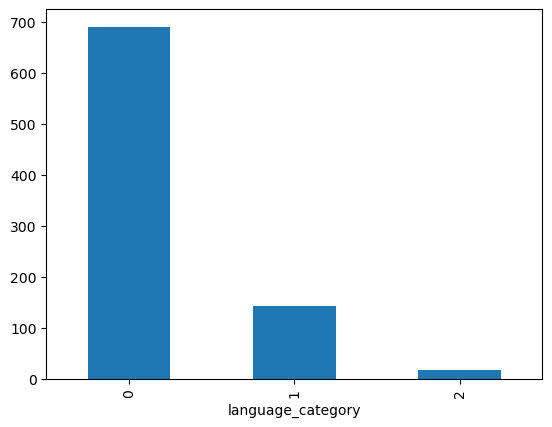

In [210]:
# rating language -> if english then 0 elif Espanol then 1 else, then 2
def categorize_language(subtitle_list):
    has_english = "English" in subtitle_list
    has_espanol = "Español" in subtitle_list
    
    if has_english:
        return 0
    elif has_espanol:
        return 1
    else:
        return 2

df1['language_category'] = df1['language'].apply(categorize_language)
df1["language_category"].value_counts().plot(kind='bar')

To be changed into numericals ->

1. course_effort -> "2–3 hours per week" -> taking average = 2.5
2. course_length -> "2 weeks" -> just numerical value = 2
3. price -> "FREE-Add a Verified Certificate for $49 USD" --numerical_value-> 49


In [211]:
df1['weekly_course_effort'] = df1['course_effort'].str.extract(r'(\d+)\s*–\s*(\d+)').astype(float).mean(axis=1)
df1['course_length_numerical'] = df1['course_length'].str.extract(r'(\d+)').astype(int)
df1['price_numerical'] = df1['price'].str.extract(r'\$(\d+)').astype(float)
df1["n_enrolled"] = df1["n_enrolled"].replace(',','',regex=True).astype(int)

In [212]:
df1.drop(["course_effort", "course_length", "price", "institution","instructors", "subject", "language", "subtitles","Level","title"], axis=1, inplace=True)

In [213]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 973
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_enrolled               851 non-null    int32  
 1   course_type              851 non-null    bool   
 2   subject_category         851 non-null    int64  
 3   institution_category     851 non-null    int64  
 4   Level_numeric            851 non-null    int64  
 5   subtitle_category        851 non-null    int64  
 6   language_category        851 non-null    int64  
 7   weekly_course_effort     851 non-null    float64
 8   course_length_numerical  851 non-null    int32  
 9   price_numerical          851 non-null    float64
dtypes: bool(1), float64(2), int32(2), int64(5)
memory usage: 60.7 KB


In [214]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)


In [215]:
X_scaled.shape

(851, 10)

In [216]:
# Random state for whole analysis
random_state = 17

### t-SNE

C:\Users\rishi\AppData\Local\Temp\ipykernel_8548\2187025216.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


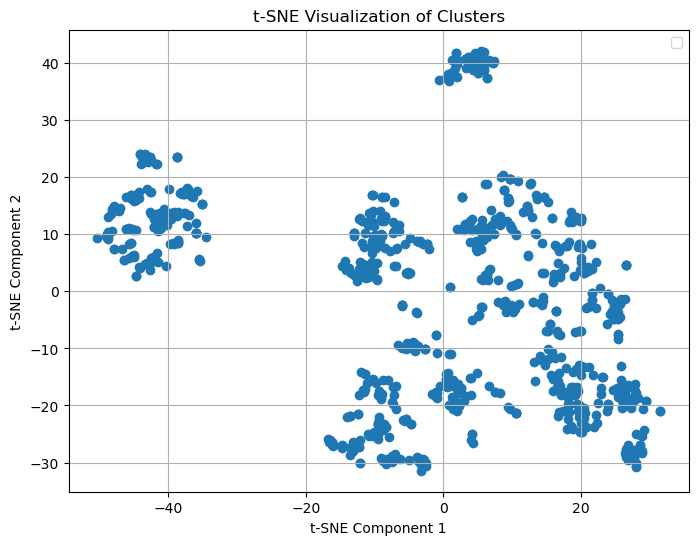

In [217]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=random_state)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()


### PCA

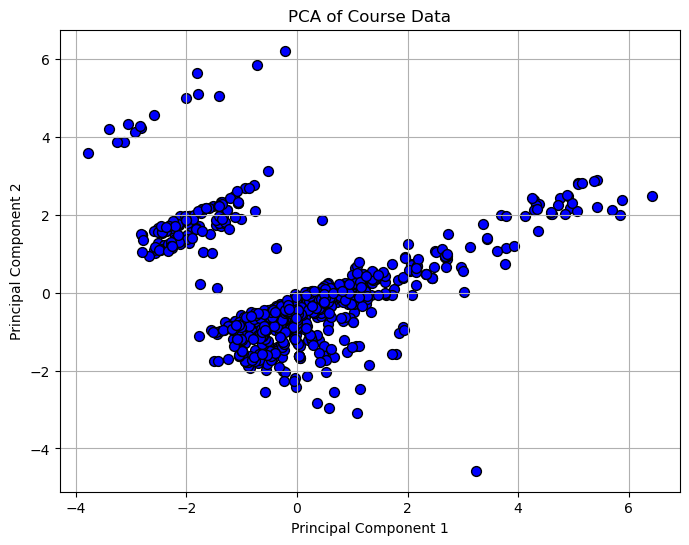

In [218]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Course Data')
plt.grid(True)
plt.show()

### KMeans

c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

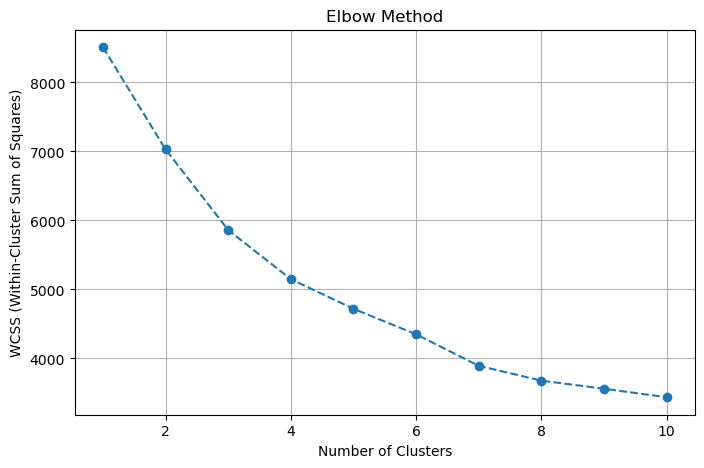

In [219]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [220]:
from sklearn.cluster import KMeans

n = 3  # though none of them seems great

kmeans = KMeans(n_clusters=n, init='k-means++', random_state=random_state)
y_kmeans = kmeans.fit_predict(X_scaled)


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


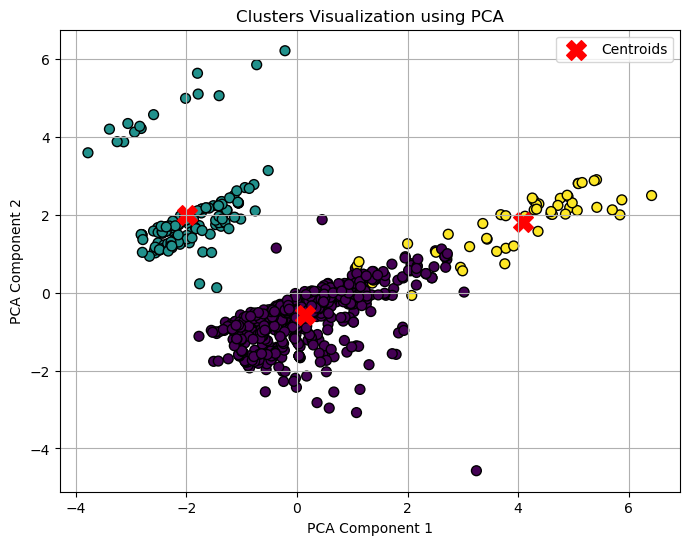

In [221]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Clusters Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

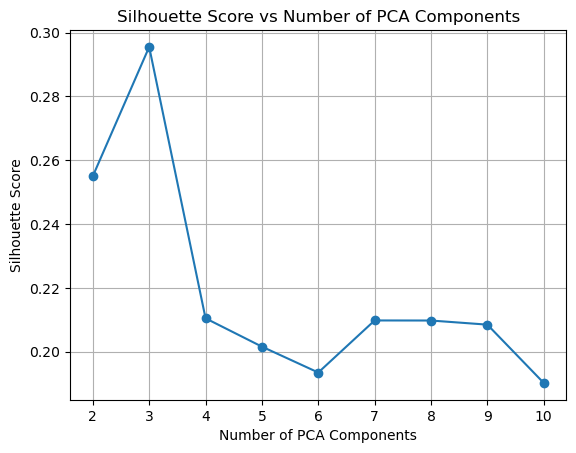

In [222]:
from sklearn.metrics import silhouette_score


n_components_range = range(2, 11)  # Silhouette scores need at least 2 clusters
silhouette_scores = []

for n in n_components_range:
    
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=random_state)
    y_kmeans = kmeans.fit_predict(X_scaled)
        
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plotting
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of PCA Components')
plt.xticks(n_components_range)
plt.grid()
plt.show()

In [223]:
# taken from https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score



def silhoutte_plot(X, X2=None, range_n_clusters=[2], pca_plot = False):
    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    if(X2 is None):
        X2 = X
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X2[:, 0], X2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        pca.fit_transform(X_scaled)
        centers = clusterer.cluster_centers_
        if pca_plot:
            centers = pca.transform(centers)
            
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.2550349473269936
For n_clusters = 3 The average silhouette_score is : 0.2955348409010482


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.21047318386612082
For n_clusters = 5 The average silhouette_score is : 0.20159017217384156


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.19347692141218023


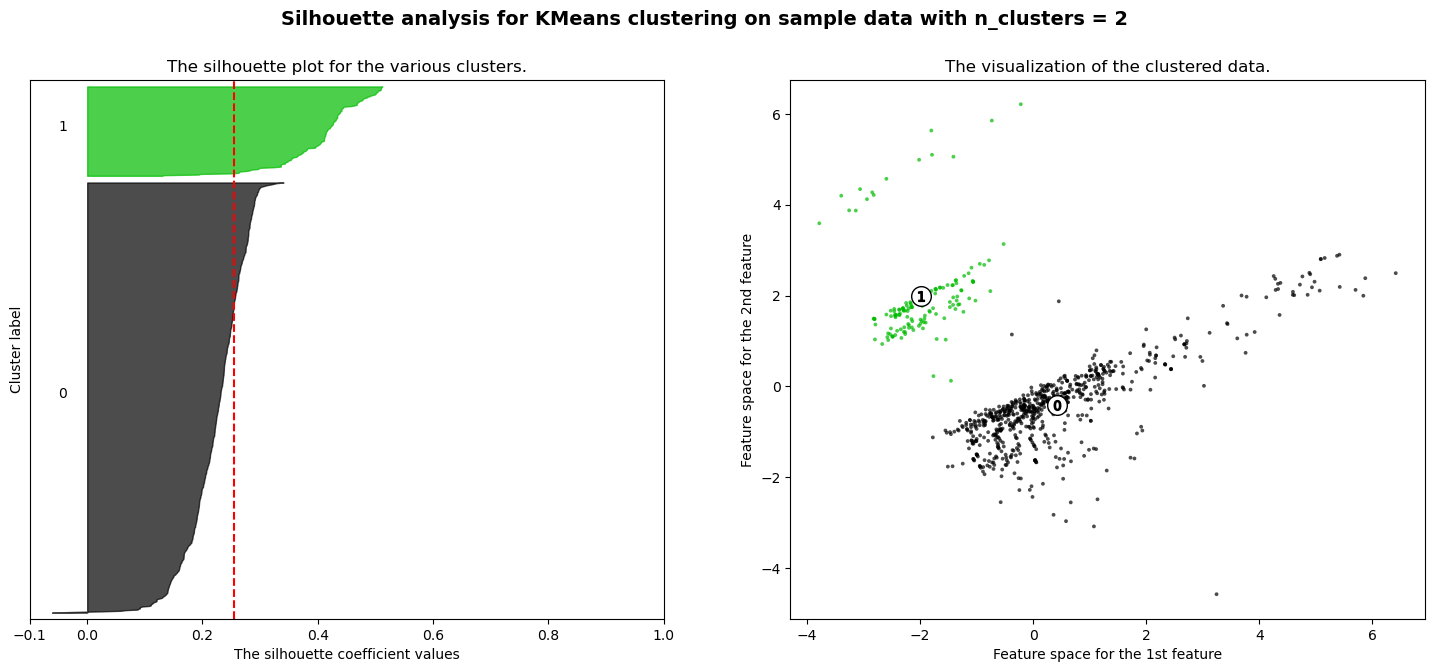

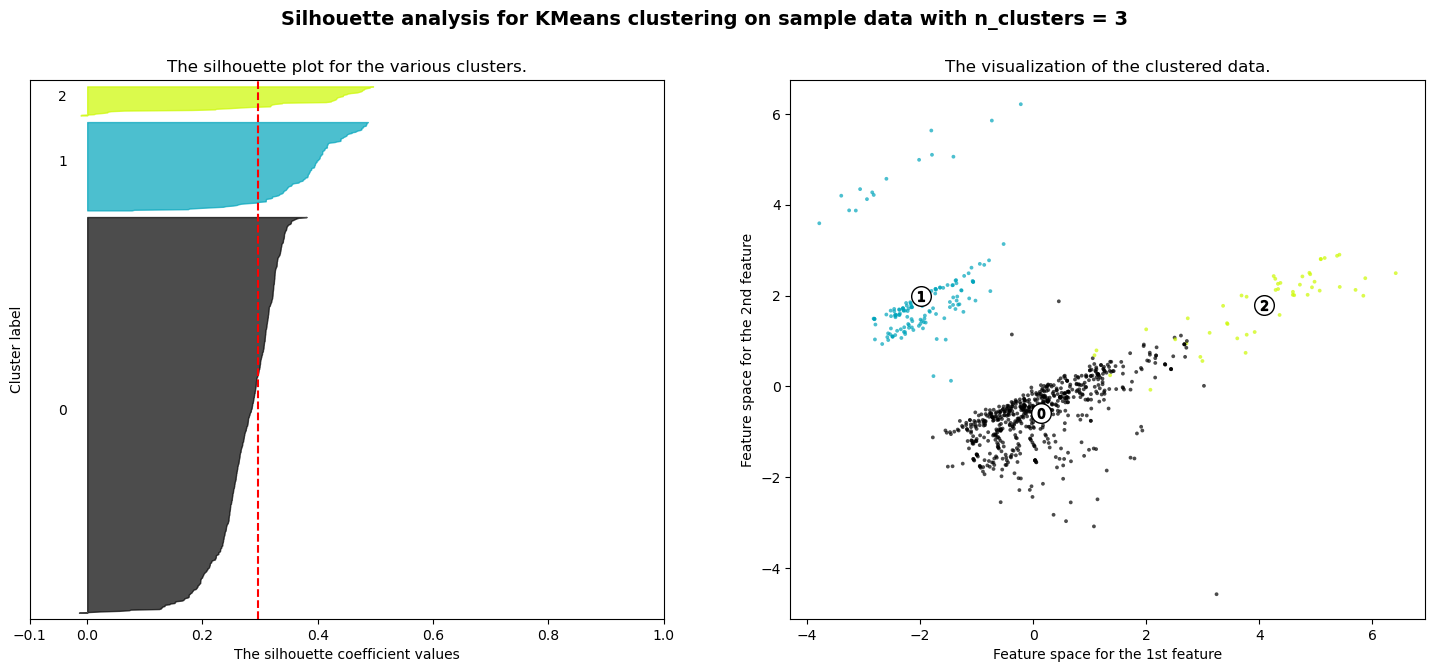

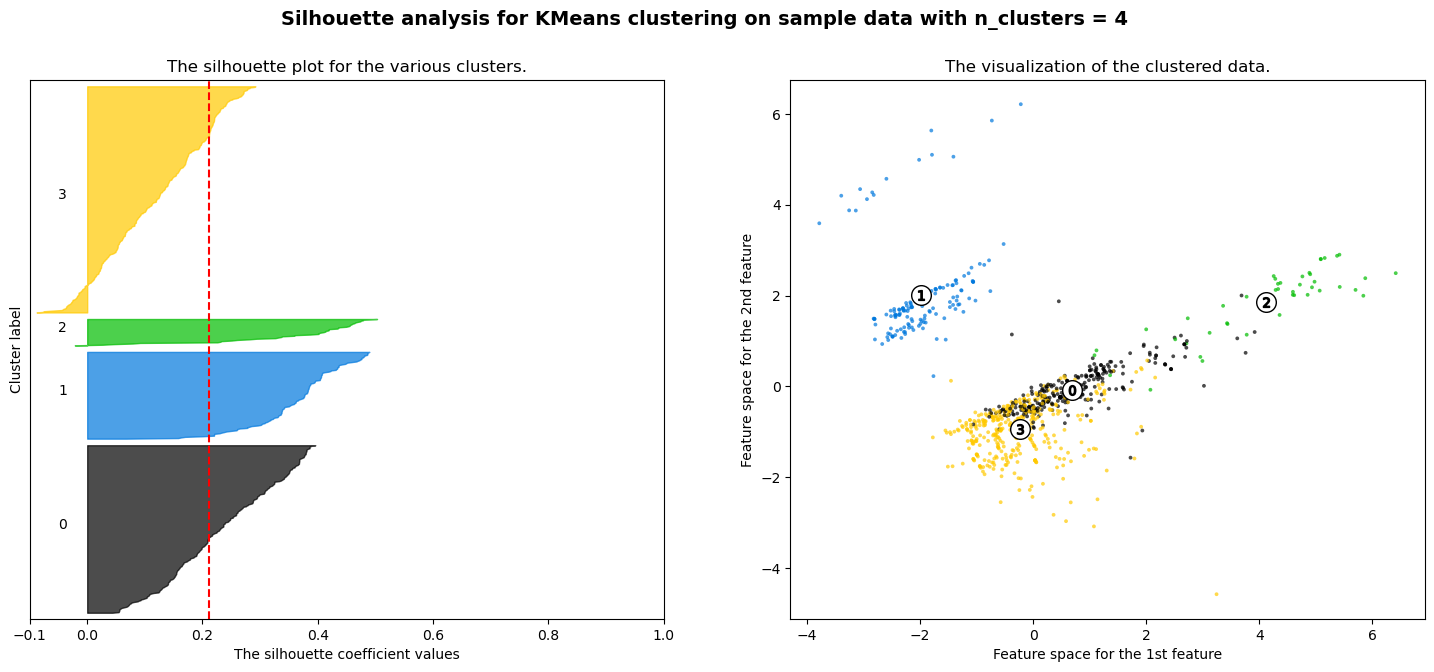

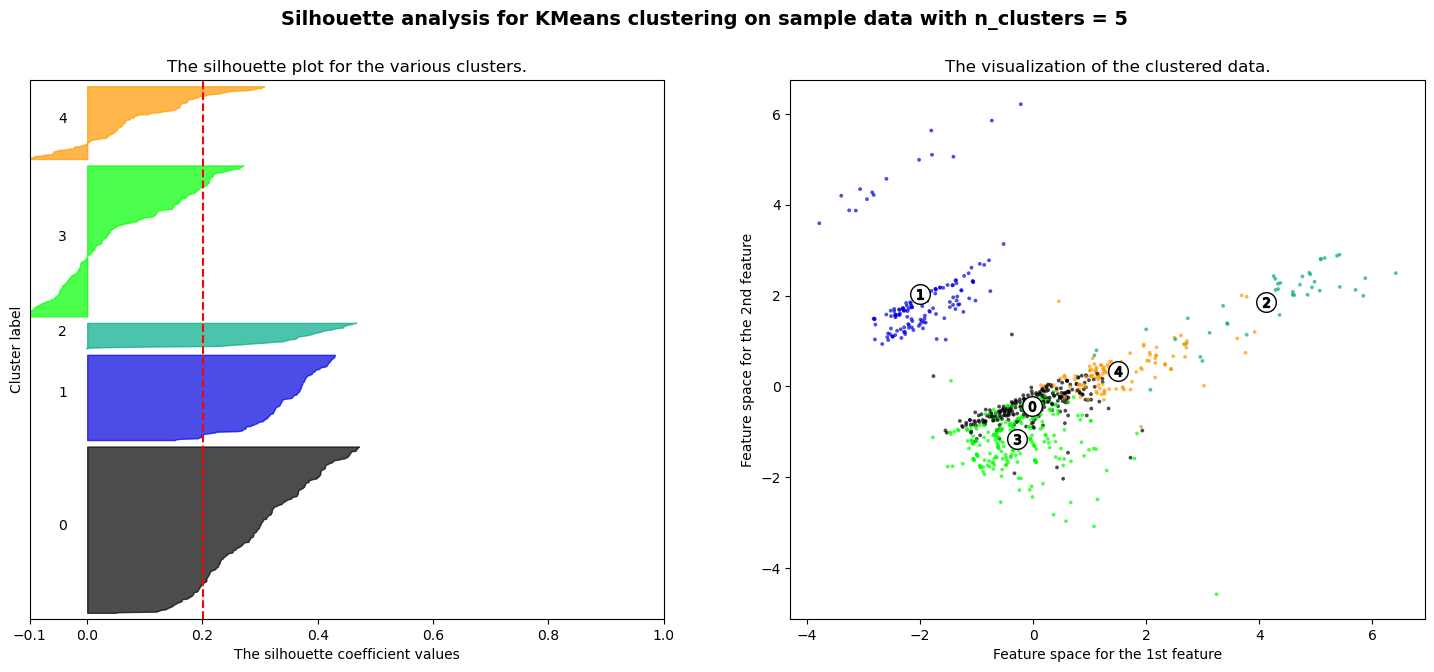

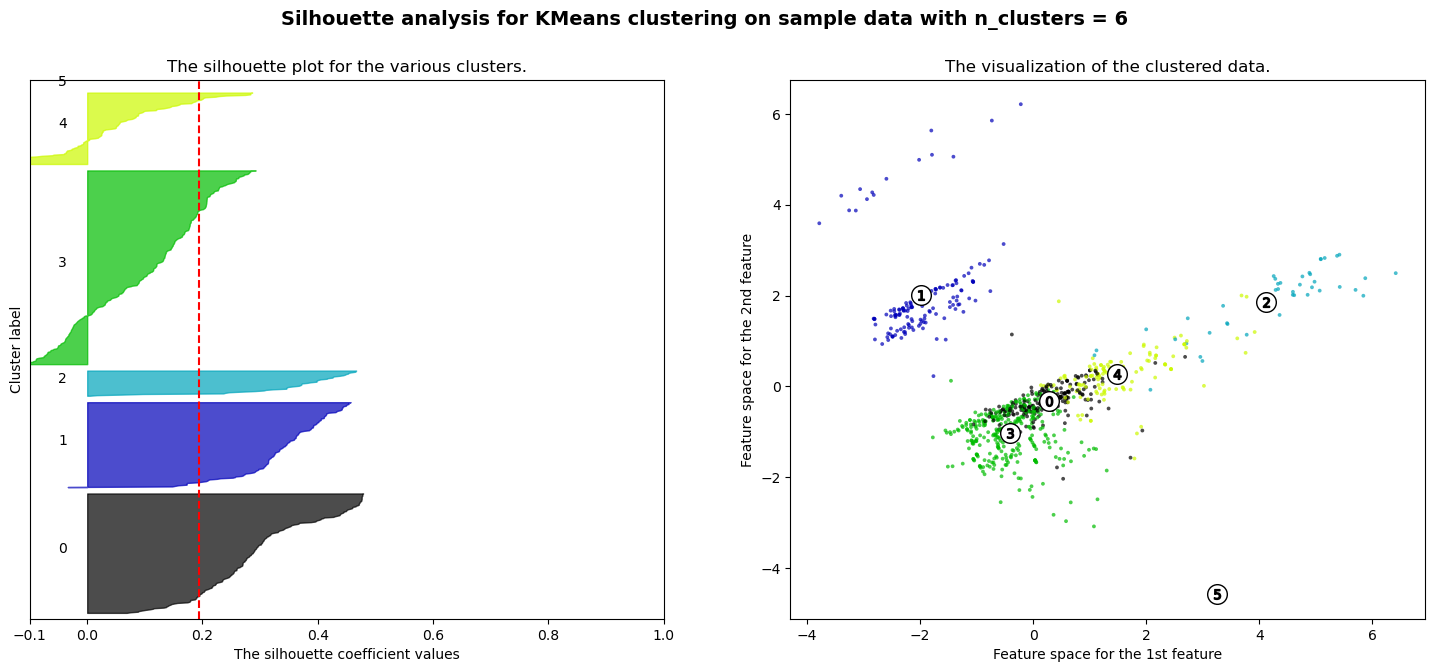

In [224]:
range_n_clusters = [2, 3, 4, 5, 6]

silhoutte_plot(X=X, X2=X_pca, range_n_clusters=range_n_clusters, pca_plot=True)

More or less -> n_clusters with 3 clusters looks better

### May be PCA, then KMeans

c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

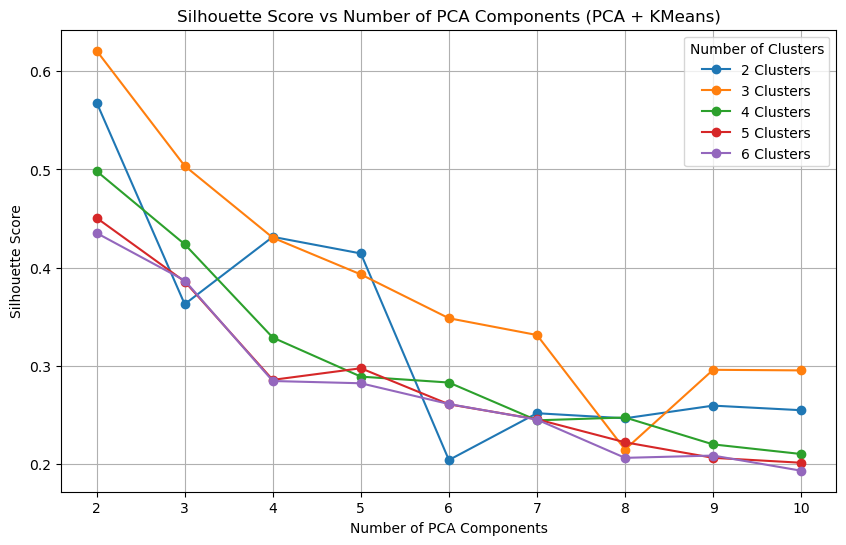

In [225]:

# Define the range of PCA components and number of clusters
n_components_range = range(2, 11)
n_clusters_range = range(2, 7)

# Dictionary to store silhouette scores for each number of clusters
silhouette_scores_dict = {n_clusters: [] for n_clusters in n_clusters_range}

# Loop over the range of number of clusters
for n_clusters in n_clusters_range:
    silhouette_scores = []
    for n in n_components_range:
        # Apply PCA
        pca = PCA(n_components=n)
        X_pca = pca.fit_transform(X_scaled)

        # Perform KMeans clustering on the PCA-reduced data
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = kmeans.fit_predict(X_pca)

        # Calculate silhouette score for the clustering
        score = silhouette_score(X_pca, cluster_labels)
        silhouette_scores.append(score)
    
    # Store the silhouette scores for each cluster number
    silhouette_scores_dict[n_clusters] = silhouette_scores

# Plotting the silhouette scores for each cluster number
plt.figure(figsize=(10, 6))
for n_clusters, scores in silhouette_scores_dict.items():
    plt.plot(n_components_range, scores, marker='o', label=f'{n_clusters} Clusters')

plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of PCA Components (PCA + KMeans)')
plt.xticks(n_components_range)
plt.grid()
plt.legend(title='Number of Clusters')
plt.show()

# 2 pca components and 3 clusters turns out to be better

c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


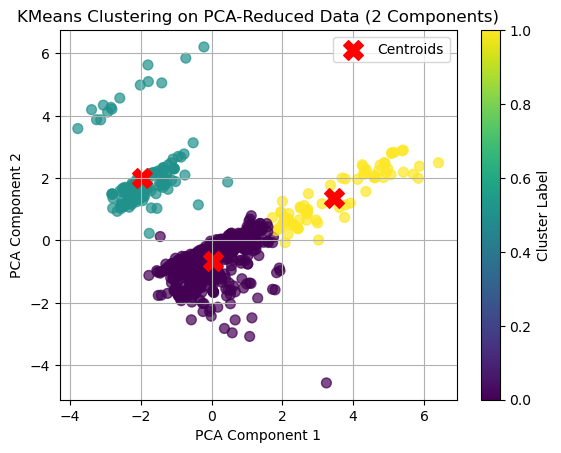

In [226]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming X is your original data
X_scaled = StandardScaler().fit_transform(df1)
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform KMeans clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=random_state)  # Using 3 clusters as an example
cluster_labels = kmeans.fit_predict(X_pca)

# Get the centroids in the PCA-reduced space
centroids = kmeans.cluster_centers_

# Plotting the scatter plot with cluster colors and centroids
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering on PCA-Reduced Data (2 Components)')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid()

c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5679851529805972
For n_clusters = 3 The average silhouette_score is : 0.6207159480473757


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.49820737493825673
For n_clusters = 5 The average silhouette_score is : 0.45061215191349296


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4352499004161143


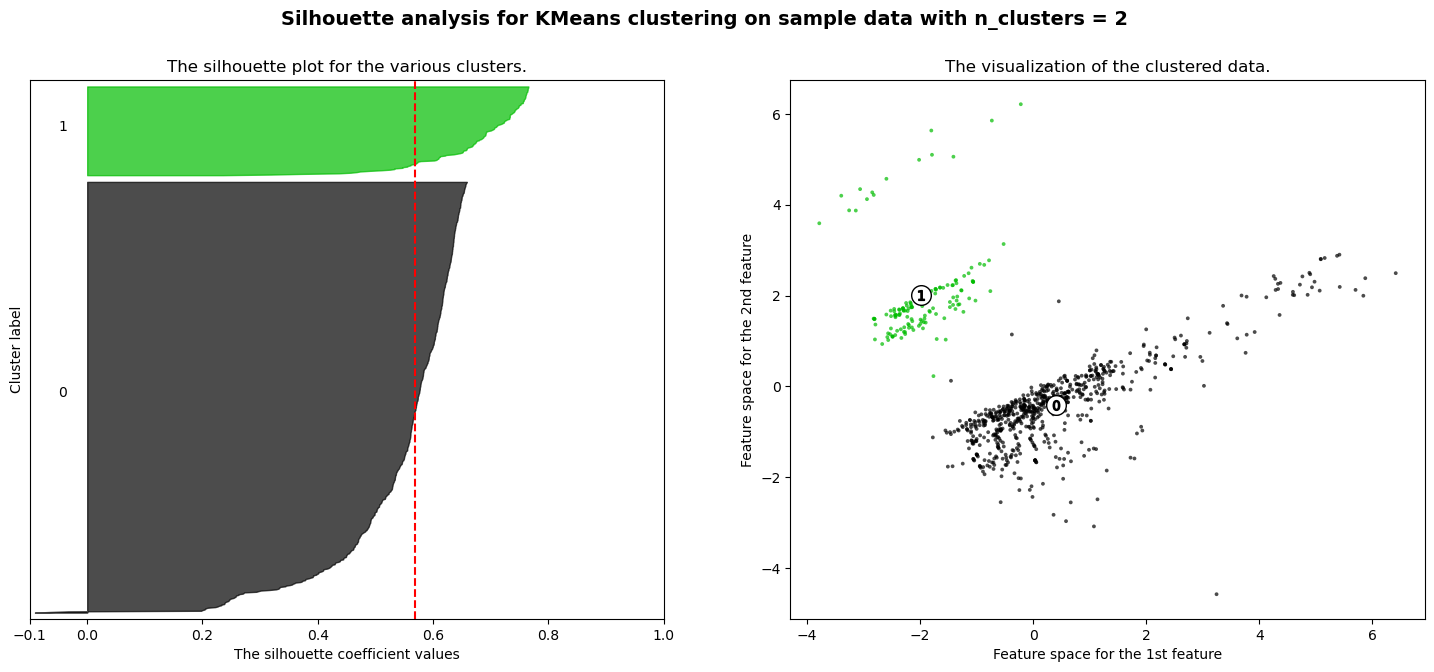

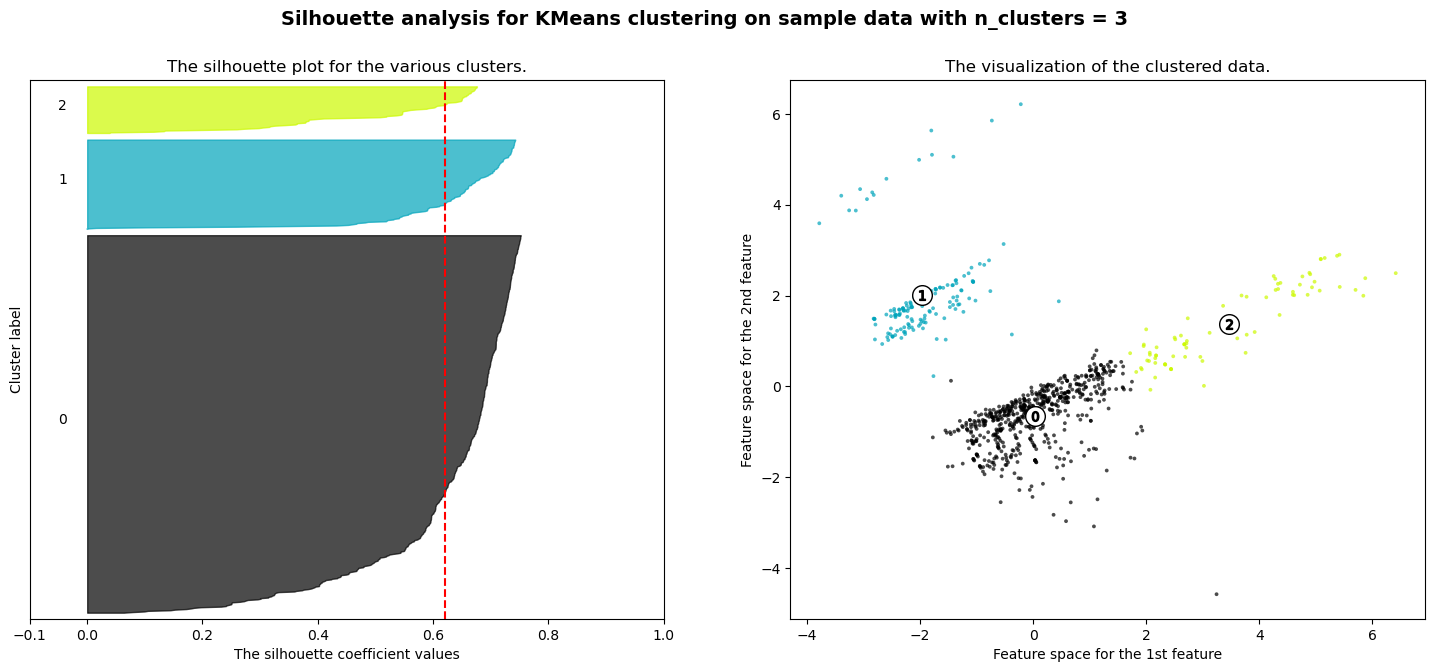

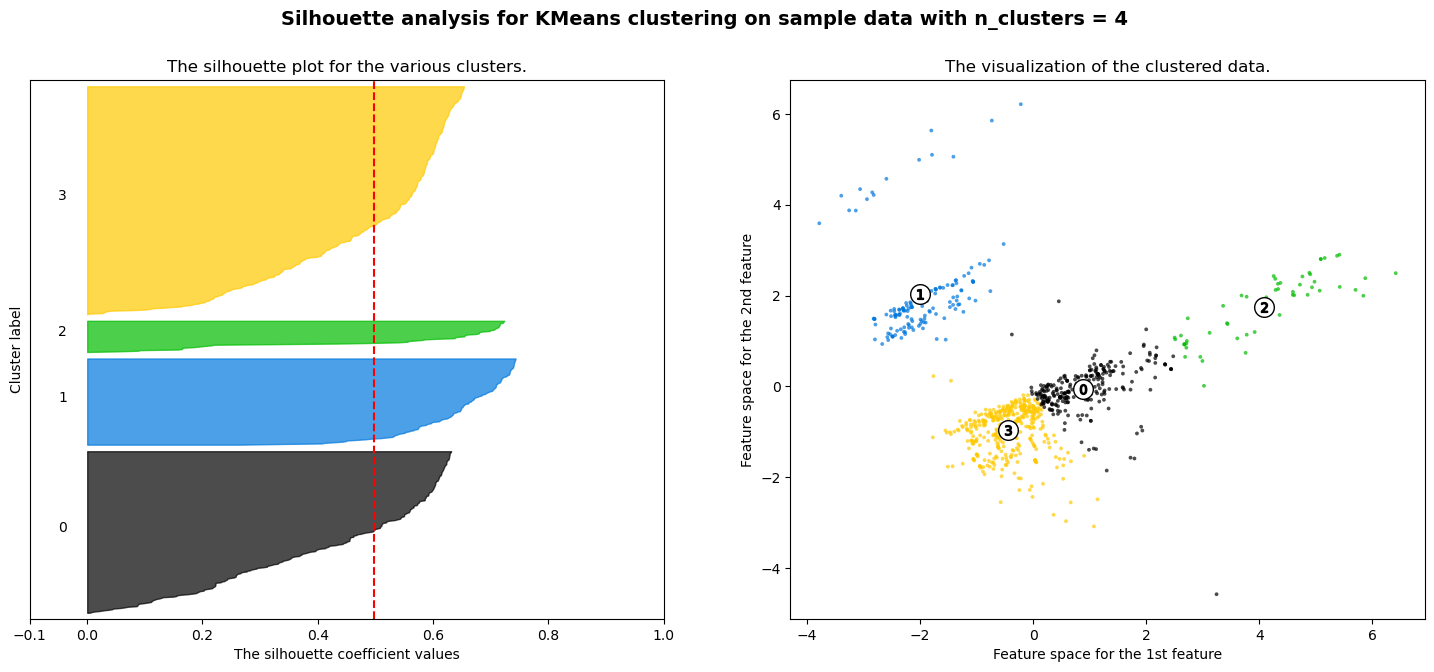

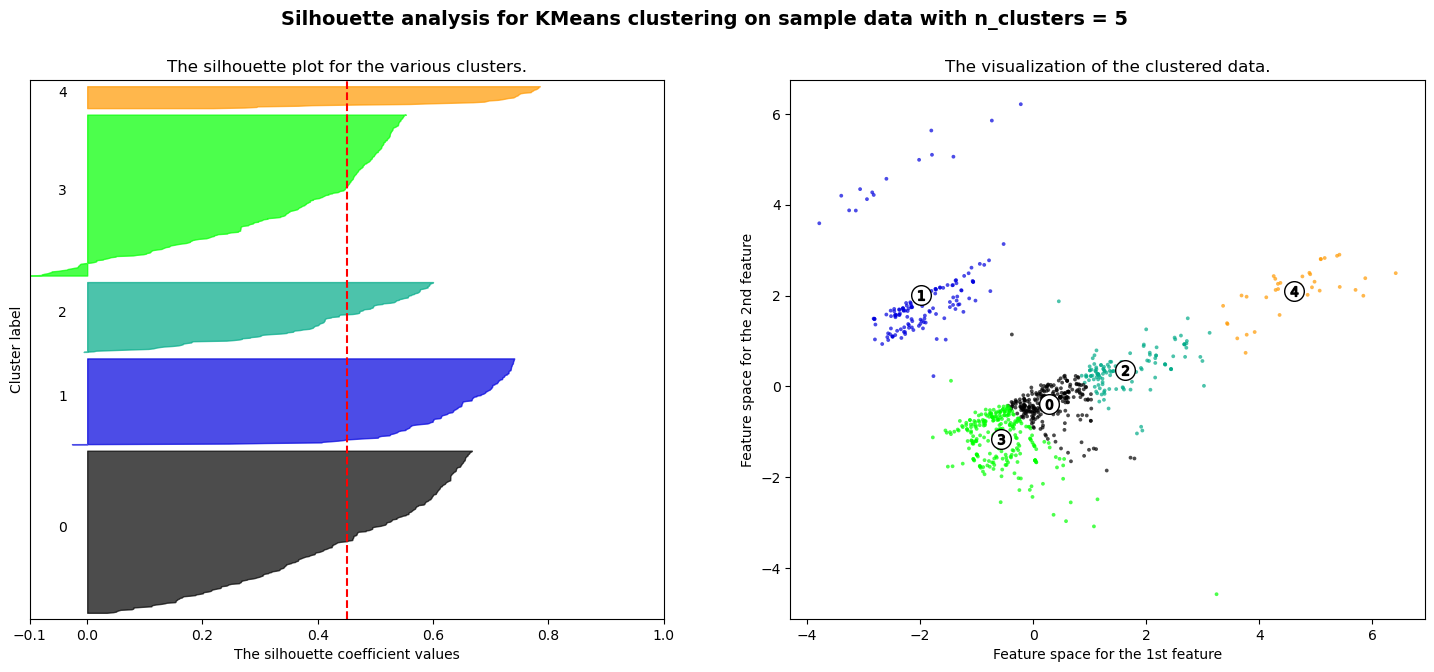

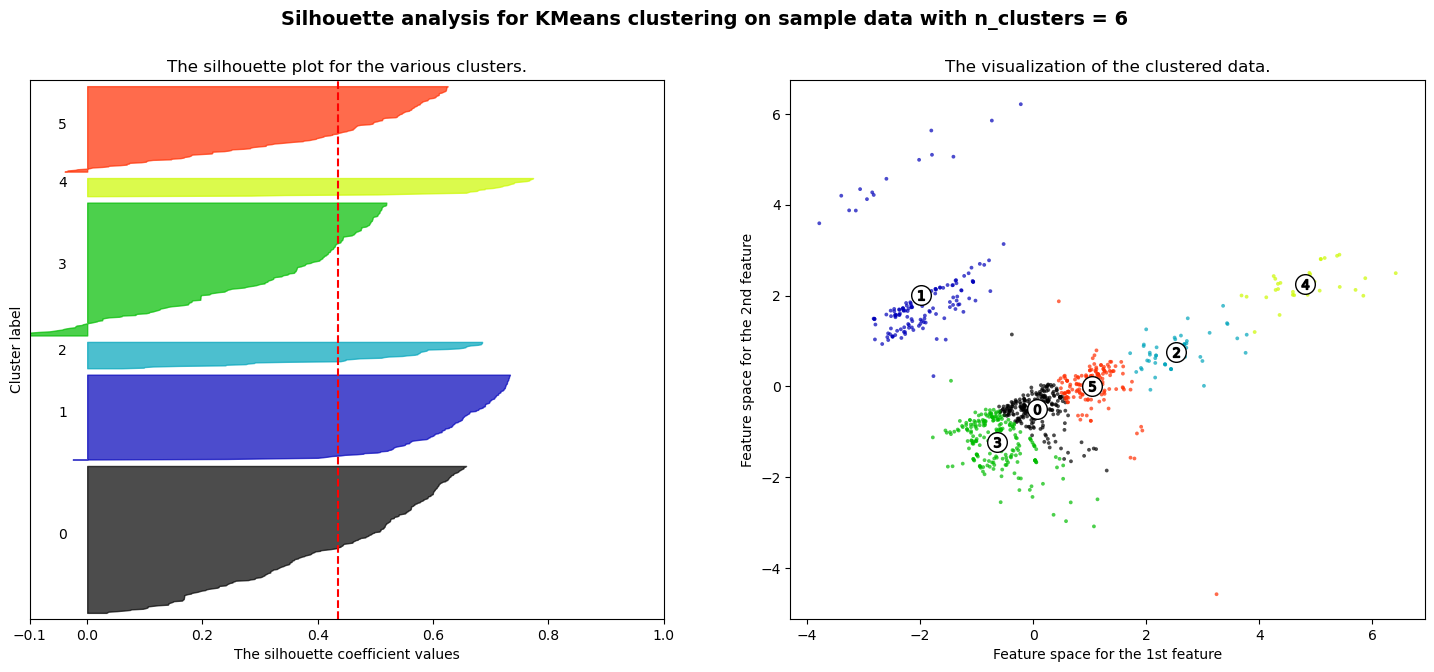

In [227]:
silhoutte_plot(X_pca, range_n_clusters=range_n_clusters)

## From Silhouette Coefficient Plots too -> 3 clusters give 0.621 average Silhouette score
#### after running on 10 different random states